In [1]:
#Python weather API project
#-------Scatters-------------
#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude

from citipy import citipy
import openweathermapy.core as owm
import decimal
import requests
import json
import numpy as np
import pandas as pd
from configapi import gkey
import matplotlib.pyplot as plt
import random
from random import shuffle

In [2]:
#Generating random numbers for longitude
long = []
while len(long) < 600:
    long.append(random.randint(-1800000, 1800000)/10000)
    shuffle(long)

In [3]:
#Generating random numbers for lattitude (staying under 80's for major cities)
lat = []
while len(lat) < 600:
    lat.append(random.randint(-800000, 800000)/10000)
    shuffle(lat)

In [4]:
#Creating initial DF with my longitude and latitude
weather = pd.DataFrame({"Latitude": lat, "Longitude": long})
weather.head()

,Latitude,Longitude
0,-70.9663,41.6271
1,9.7192,46.9039
2,-8.9983,-42.4883
3,-0.2283,96.2052
4,0.2286,-131.6532


In [5]:
#Building columns in my DF to place data
weather["City"] = ""
weather["Country"] = ""
weather["Temperature"] = ""
weather["Cloudiness"] = ""
weather["Wind Speed"] = ""
weather["Humidity"] = ""
weather["City ID"] = ""
weather["URL"] = ""
weather = weather [["City","Country", "Temperature", "Cloudiness", "Wind Speed", "Humidity","Latitude","Longitude","City ID", "URL"]]
weather.head()

,City,Country,Temperature,Cloudiness,Wind Speed,Humidity,Latitude,Longitude,City ID,URL
0,,,,,,,-70.9663,41.6271,,
1,,,,,,,9.7192,46.9039,,
2,,,,,,,-8.9983,-42.4883,,
3,,,,,,,-0.2283,96.2052,,
4,,,,,,,0.2286,-131.6532,,


In [6]:
# Using the Citipy library to pull in cities using the random longitude and lattitude numbers obtained above
#Placing the cities in the Dataframe

for index, row in weather.iterrows():
    latitude = row['Latitude']
    longitude = row ["Longitude"]
    
    weather.set_value(index, "City", citipy.nearest_city(latitude, longitude).city_name)
    weather.set_value(index, "Country", citipy.nearest_city(latitude, longitude).country_code)
    
weather.head()

C:\Users\Craig\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Craig\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


,City,Country,Temperature,Cloudiness,Wind Speed,Humidity,Latitude,Longitude,City ID,URL
0,port alfred,za,,,,,-70.9663,41.6271,,
1,odweyne,so,,,,,9.7192,46.9039,,
2,sao raimundo nonato,br,,,,,-8.9983,-42.4883,,
3,sibolga,id,,,,,-0.2283,96.2052,,
4,atuona,pf,,,,,0.2286,-131.6532,,


In [7]:
#--------------------------------------------------------------------------
# Starting API calls
#--------------------------------------------------------------------------
# Using Imperial metrics to grab Fahrenheit
#URL Structure obtained here: https://openweathermap.org/current#data
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

In [8]:
#Testing an API pull, looking at the JSON
print (url + "&appid=" + gkey + "&q=" + "Las Vegas")

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=950e9ed0f4c0085f9a9076f8c4369dfc&q=Las Vegas


In [9]:
#Looping through the DF: grabbing url, api key, and city. 
#Building the url 
#pulling it in json format
for index, row in weather.iterrows():
    city = row['City']
    
    try:
        url_build = url + "&appid=" + gkey + "&q=" + city
        weather_info = requests.get(url_build).json()
        
#Placing in DF       

        weather.set_value(index, "Temperature", weather_info['main']['temp'])
        weather.set_value(index, "Humidity", weather_info['main']['humidity'])
        weather.set_value(index, "Cloudiness", weather_info['clouds']['all'])
        weather.set_value(index, "Wind Speed", weather_info['wind']['speed'])
        weather.set_value(index, "City ID", weather_info['id'])
        weather.set_value(index, "URL", url_build)
        print(f"{city},{weather_info['id']}")


#If it does not work then place "NaN" in location
    except:
        weather.set_value(index, "Temperature", "No Data from API")
        weather.set_value(index, "Humidity", "No Data from API")
        weather.set_value(index, "Cloudiness", "No Data from API")
        weather.set_value(index, "Wind Speed", "No Data from API")
        weather.set_value(index, "City ID", "No Data from API")
        weather.set_value(index, "URL", "No Data from API")
        
        print("NaN")

C:\Users\Craig\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\Craig\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Craig\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Craig\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\Craig\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_l

port alfred,964432
NaN
NaN
sibolga,1213855
atuona,4020109
butaritari,2110227
makakilo city,5850554
arman,2127060
kaseda,1859964
camacha,2270385
albany,5106834
rikitea,4030556
nanortalik,3421765
hilo,5855927
itarema,3393692
athabasca,5887916
pascagoula,4440397
lodja,211647
puerto ayora,3652764
saint-philippe,6138908
georgetown,3378644
chapais,5919850
saskylakh,2017155
aasiaat,3424901
new norfolk,2155415
puerto ayora,3652764
poum,787487
ushuaia,3833367
hithadhoo,1282256
NaN
alpena,4984075
punta arenas,3874787
florianopolis,3463237
qaanaaq,3831208
tasiilaq,3424607
puerto ayora,3652764
hasaki,2112802
castro,3896218
maniitsoq,3421982
tecpan,3588476
new norfolk,2155415
punta arenas,3874787
victoria,1733782
puerto quijarro,3465342
cape town,3369157
lata,1253628
norman wells,6089245
bonnyville,5905616
saint-philippe,6138908
provideniya,4031574
port elizabeth,4501427
thompson,6165406
cape town,3369157
jamestown,2069194
havre,5656497
atuona,4020109
yaan,2338660
tuatapere,2180815
albany,5106834
c

russell,3844421
mataura,6201424
enshi,1811720
cape town,3369157
port alfred,964432
vaini,1273574
husavik,5961417
NaN
pundaguitan,1698289
castro,3896218
xining,1788852
roebourne,2062276
avarua,4035715
tarecuato,3982382
cape town,3369157
upernavik,3418910
shediac,6145668
georgetown,3378644
dwarka,1273294
cape town,3369157
ushuaia,3833367
castro,3896218
kaitangata,2208248
hermanus,3366880
tasiilaq,3424607
hobart,2163355
araouane,2460954
kruisfontein,986717
punta arenas,3874787
ardrossan,2657125
kenai,5866063
ngunguru,2186111
samana,3655185
kapaa,5848280
kaitangata,2208248
ilulissat,3423146
yulara,6355222
rikitea,4030556
klaksvik,2618795
vologda,472459
kalakamati,933390
mount isa,2065594
vila,3164565
rikitea,4030556
dikson,1507390
rikitea,4030556
yining,1786538
cape town,3369157
NaN
victor harbor,2059470
rikitea,4030556
kapaa,5848280
ayagoz,1525988
biu,2346995
pidhorodne,696943
ancud,3899695
avarua,4035715
jamestown,2069194
olinda,3650121
mejorada del campo,3116963
NaN
cidreira,3466165
mat

In [10]:
weather.head()

,City,Country,Temperature,Cloudiness,Wind Speed,Humidity,Latitude,Longitude,City ID,URL
0,port alfred,za,72.43,0,9.75,57,-70.9663,41.6271,964432,http://api.openweathermap.org/data/2.5/weather...
1,odweyne,so,No Data from API,No Data from API,No Data from API,No Data from API,9.7192,46.9039,No Data from API,No Data from API
2,sao raimundo nonato,br,No Data from API,No Data from API,No Data from API,No Data from API,-8.9983,-42.4883,No Data from API,No Data from API
3,sibolga,id,73.33,76,1.14,98,-0.2283,96.2052,1213855,http://api.openweathermap.org/data/2.5/weather...
4,atuona,pf,79.81,0,15.01,100,0.2286,-131.6532,4020109,http://api.openweathermap.org/data/2.5/weather...


In [11]:
#Removing the the "no data" returns
weather_cleaned = weather[weather["URL"]!="No Data from API"]
weather_cleaned.count()

City           557
Country        557
Temperature    557
Cloudiness     557
Wind Speed     557
Humidity       557
Latitude       557
Longitude      557
City ID        557
URL            557
dtype: int64

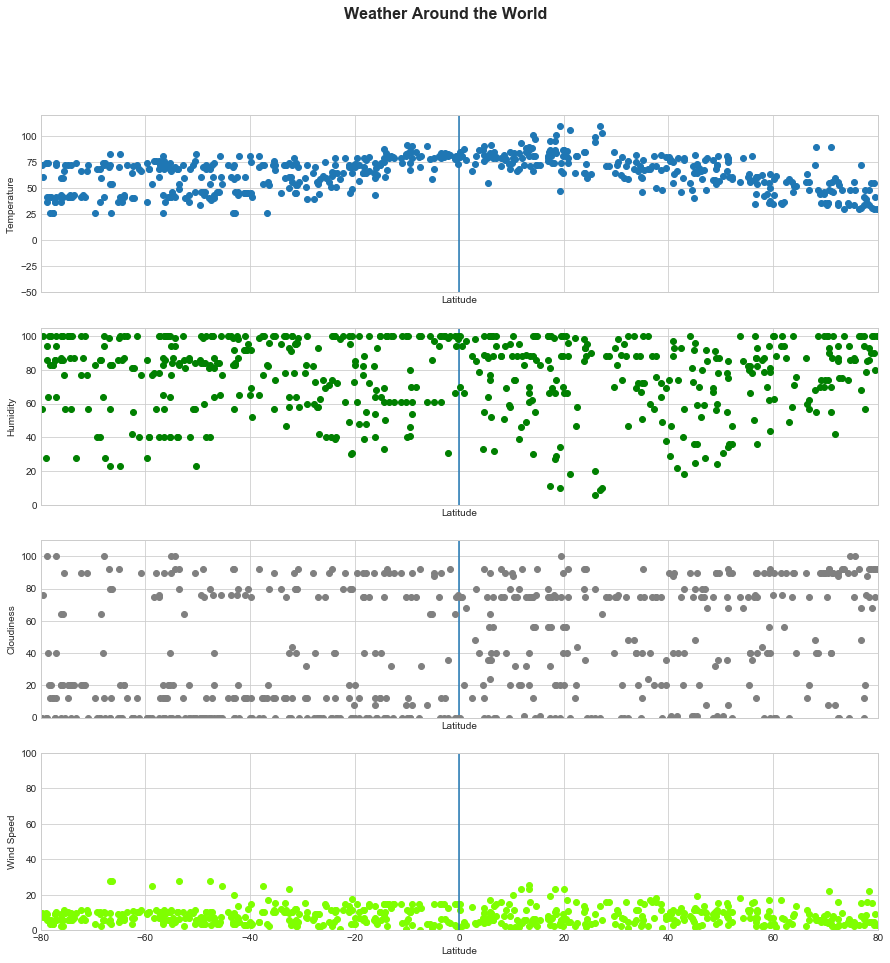

In [12]:
#Creating scatter charts
import seaborn as sns
sns.set_style("whitegrid")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True,figsize=(15,15))

fig.suptitle("Weather Around the World", fontsize=16, fontweight="bold")

#Temp vs Latitude
ax1.set_xlim(-80, 80)
ax1.set_ylim(-50, 120)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Temperature")
ax1.axvline(x=0)
ax1.plot(weather_cleaned["Latitude"], weather_cleaned["Temperature"], linewidth=0, marker='o')


#Humidity vs Latitude
ax2.set_xlim(-80, 80)
ax2.set_ylim(0, 105)
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Humidity")
ax2.axvline(x=0)
ax2.plot(weather_cleaned["Latitude"], weather_cleaned["Humidity"], linewidth=0, marker='o', color ="green")


#Coudiness vs Latitude
ax3.set_xlim(-80, 80)
ax3.set_ylim(0, 110)
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Cloudiness")
ax3.axvline(x=0)
ax3.plot(weather_cleaned["Latitude"], weather_cleaned["Cloudiness"], linewidth=0, marker='o', color ="grey")


#Wind Speed vs Latitude
ax4.set_xlim(-80, 80)
ax4.set_ylim(0, 100)
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Wind Speed")
ax4.plot(weather_cleaned["Latitude"], weather_cleaned["Wind Speed"], linewidth=0, marker='o', color ="chartreuse")
ax4.axvline(x=0)

plt.savefig("Weather.png")
plt.show()

In [ ]:
weather_cleaned.to_json("Weather.json")